In [1]:
import numpy as np

a = np.array([range(i, i+4) for i in [1, 3, 5]])
print(a)

[[1 2 3 4]
 [3 4 5 6]
 [5 6 7 8]]


Shape: (5215, 7)
Columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
         date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100
Missing values:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64
Descriptive Statistics:
               open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073

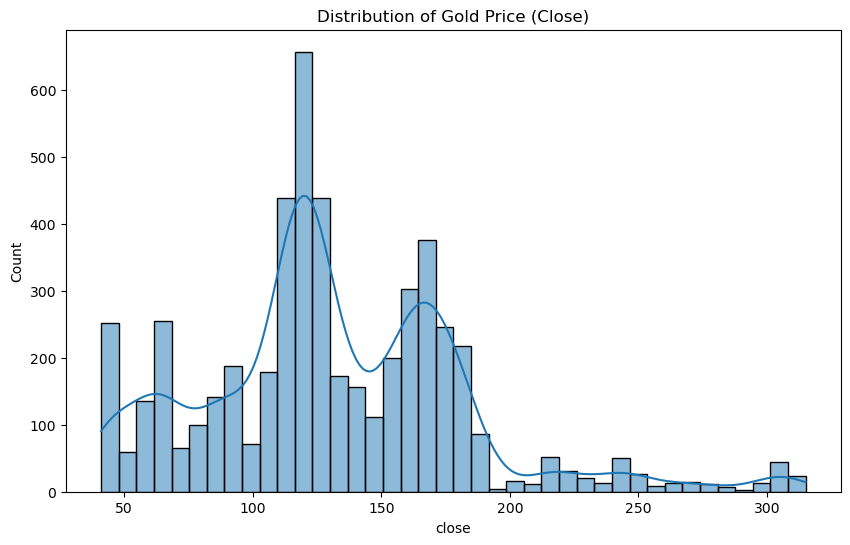

        date       open       high        low      close  adj_close    volume  \
0 2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000   
1 2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300   
2 2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000   
3 2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200   
4 2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100   

   year  month  day  day_of_week  
0  2004     11   18            3  
1  2004     11   19            4  
2  2004     11   22            0  
3  2004     11   23            1  
4  2004     11   24            2  


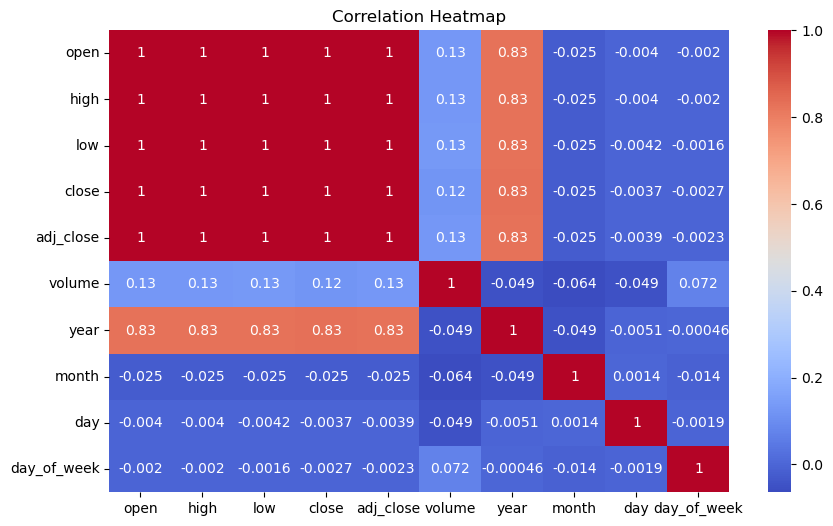

MSE: 0.13206563588043815
RMSE: 0.36340835967329943
R2 Score: 0.9999505043174256


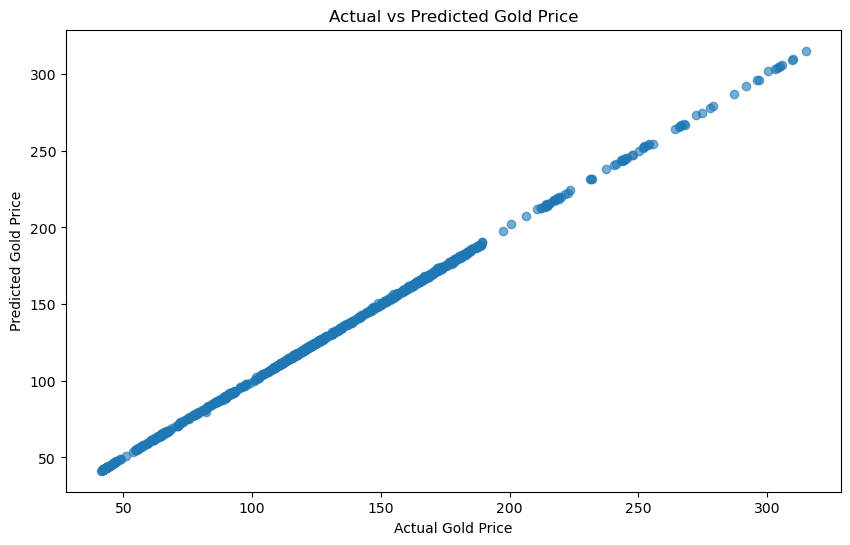

       Feature   Coefficient
3    adj_close  6.212503e-01
0         open  3.614313e-01
1         high  3.614313e-01
5         year  1.537844e-02
6        month  1.521928e-03
7          day  9.459412e-05
4       volume -2.671059e-08
8  day_of_week -5.618005e-03
2          low -3.482035e-01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
data = pd.read_csv("gold_price_data.csv")
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
print(data.head())

# Step 2: Missing values & duplicates
print("Missing values:\n", data.isnull().sum())
data = data.drop_duplicates()

# Step 3: EDA
print("Descriptive Statistics:\n", data.describe())

plt.figure(figsize=(10,6))
sns.histplot(data['close'], kde=True)
plt.title("Distribution of Gold Price (Close)")
plt.show()

# Step 5: Feature Engineering
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

print(data.head())

# Step 6: Drop original date column
data = data.drop(columns=['date'])

# Step 4: Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 7: Select features (independent vars) and target
y = data['close']
X = data.drop(columns=['close'])

# Step 5: Select features (independent vars) and target
#y = data['close']
#X = data.drop(columns=['close', 'date'], errors='ignore')

# Convert any non-numeric columns to numeric, if necessary
#X = X.apply(pd.to_numeric, errors='coerce')

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs Predicted Gold Price")
plt.show()

# Step 10: Interpret Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))